In [1]:
# Importing the necessary modules

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('datasets.csv') #getting the data
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Knowing the details of my data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [4]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
data.drop(columns=['Unnamed: 32','id'],inplace=True)  #dropping the columns that are not required at all
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
data.shape

(569, 31)

In [7]:
data.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [8]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

# What does the column name depict?

In [9]:
# Describing the head of the loaded dataframe 
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# separating x and y values for training-testing stage

In [10]:
X = data.iloc[:,1:]
y = data.iloc[:,0]

In [11]:
X.shape

(569, 30)

In [12]:
y.shape

(569,)

# Data analysis

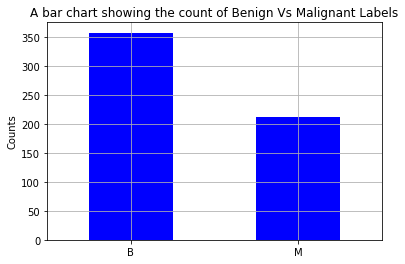

In [13]:
# Benign Vs Malignant
value_count = data['diagnosis'].value_counts()  
plt.figure()

# Plotting the Count for the value counts in the diagnosis column
value_count.plot(kind = "bar", color = "blue", rot=0)
plt.ylabel("Counts")
plt.title("A bar chart showing the count of Benign Vs Malignant Labels")
plt.grid(True)
plt.show()

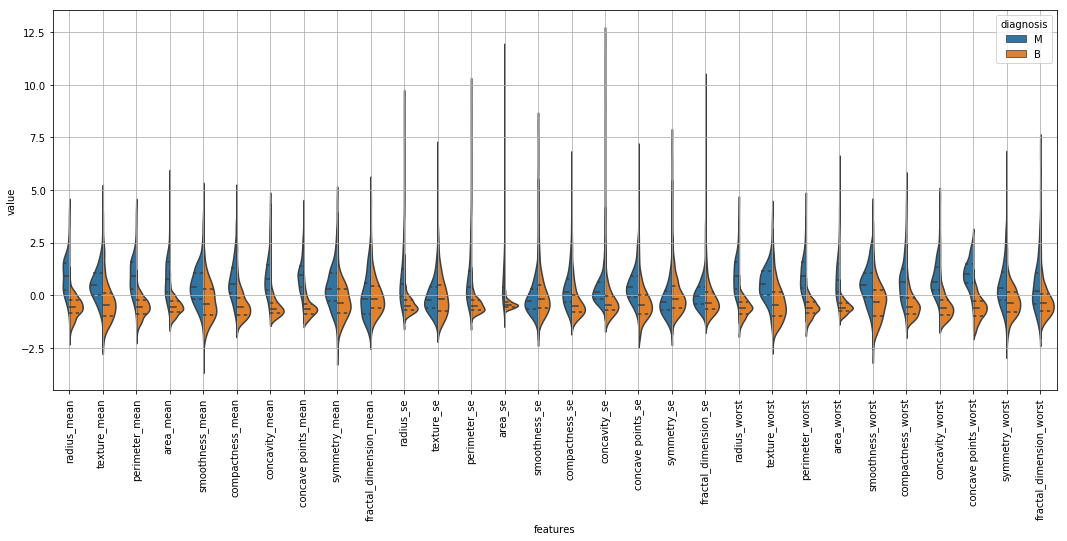

In [14]:
# Displaying a violin plot for all the features 
labels = y 
input_features = X

# Normalizing the dataframe 
df = (input_features - input_features.mean()) / (input_features.std())
input_features = pd.concat([y, df.iloc[:,:]], axis = 1)

df = pd.melt(input_features, id_vars = "diagnosis", var_name = "features", 
              value_name = "value")

# Plotting the first Ten feature
plt.figure(figsize = (18, 7))
sns.violinplot(x = "features", y = "value", hue = "diagnosis", data = df, split = True, 
              inner = "quart")
plt.xticks(rotation = 90)
plt.grid(True)
plt.show() 


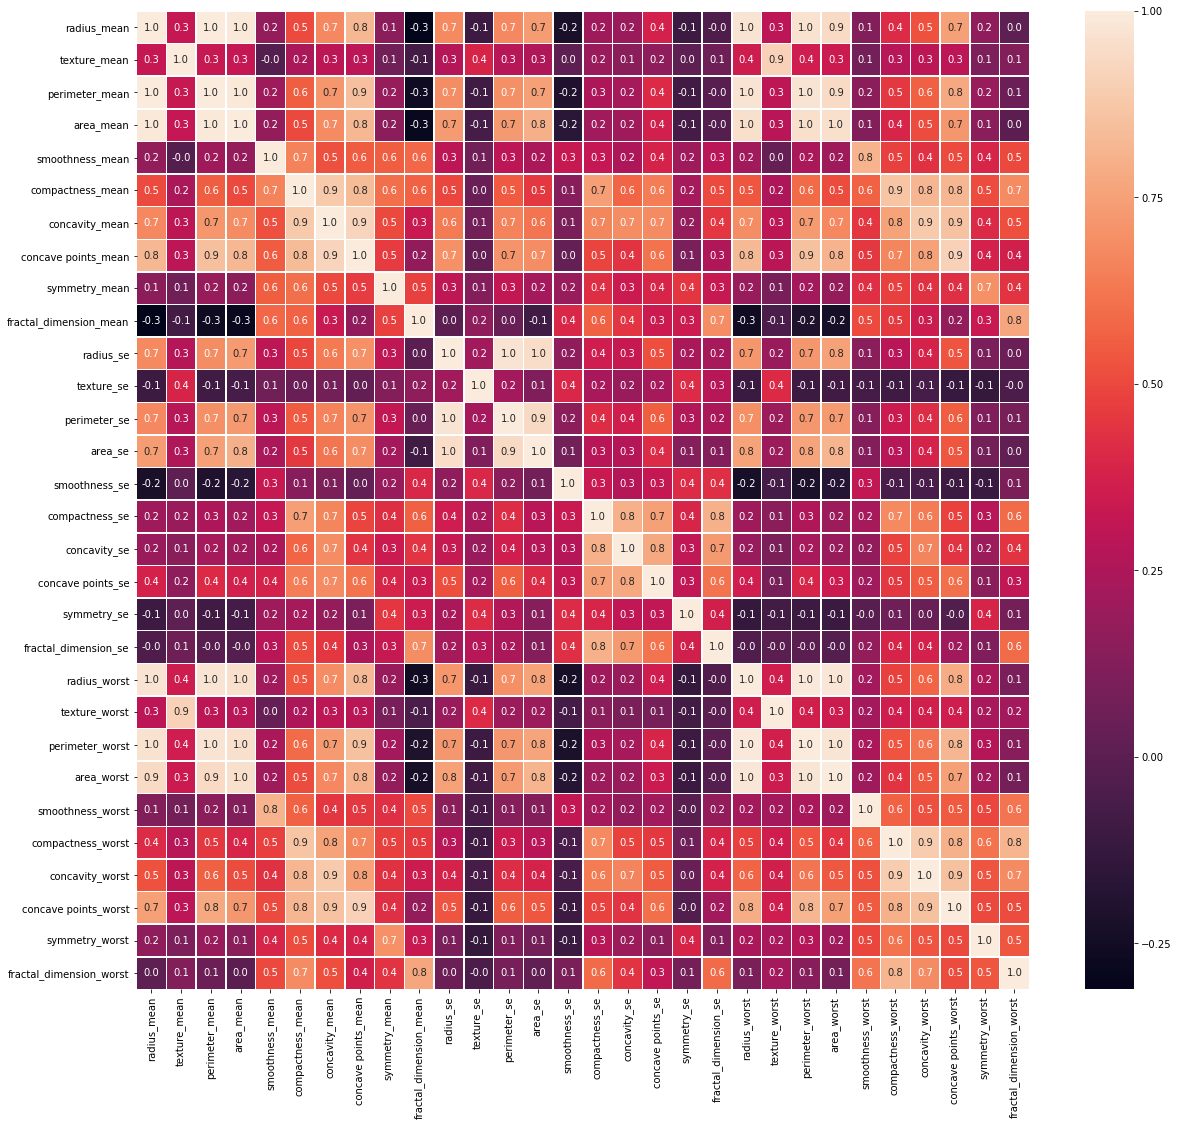

In [15]:
# Displaying a Correlation matrix of all the features of the breast cancer dataset.
f,ax = plt.subplots(figsize=(20, 18))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

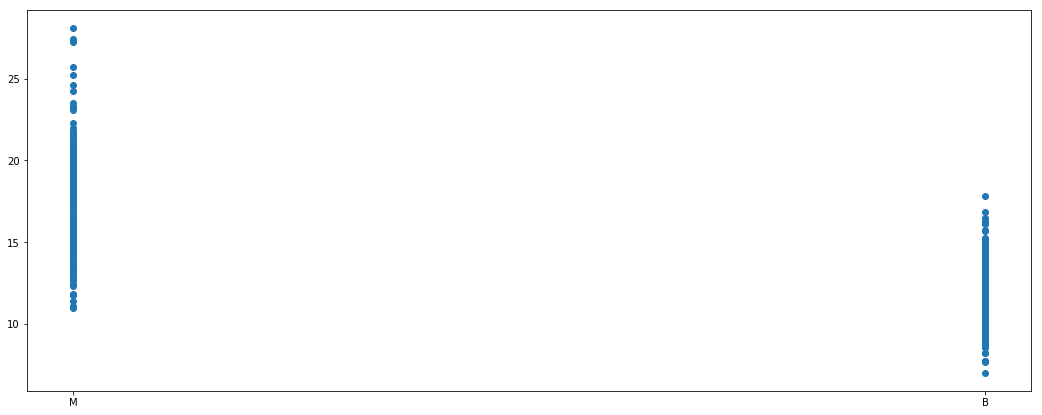

In [16]:
# Setting the figure of the Graph 
plt.figure(figsize=(18, 7))

# Plotting a scatter plot of diagnosis against radius_mean
plt.scatter(data['diagnosis'], data['radius_mean'])

# Displaying the graph 
plt.show()

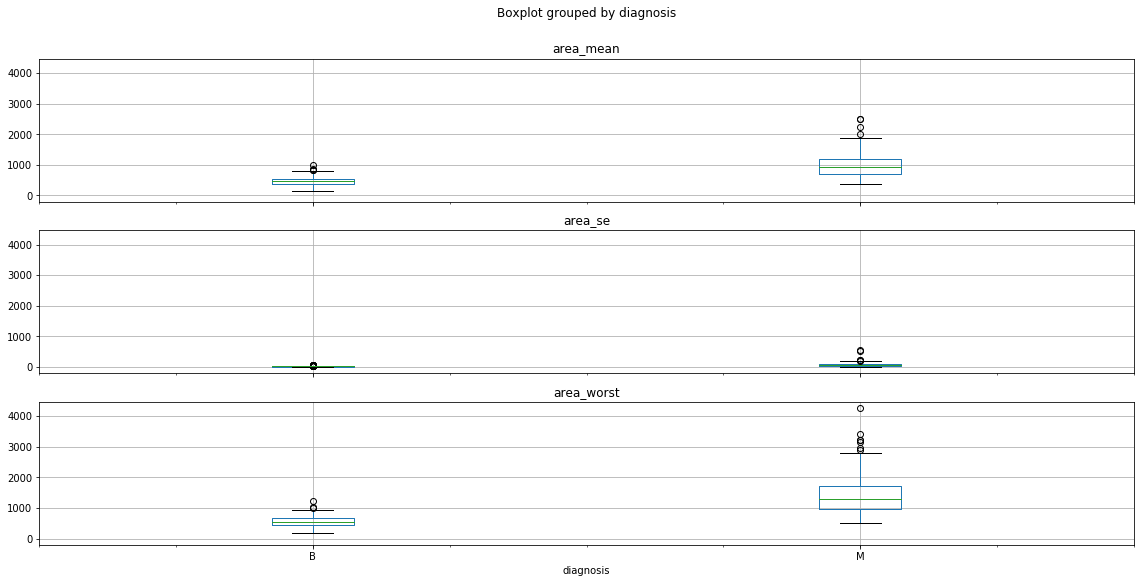

In [17]:
# Plotting a boxplot of the "Area_mean","area_se" and "area_worst"
boxplot = data.boxplot(column = ["area_mean","area_se","area_worst"], by="diagnosis", 
                    layout = (3, 1), figsize=(19, 9))
# Showing the boxplot
plt.show() 

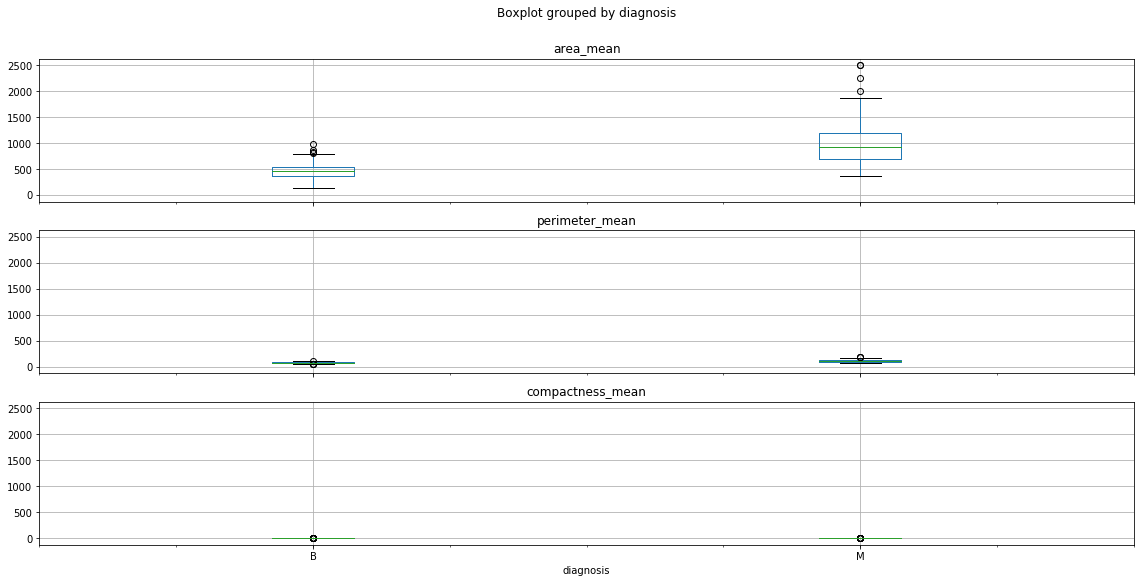

In [18]:
# Plotting a boxplot of the means of different features
boxplot = data.boxplot(column = ["area_mean","perimeter_mean","compactness_mean"], by="diagnosis", 
                    layout = (3, 1), figsize=(19, 9))
# Showing the boxplot
plt.show() 

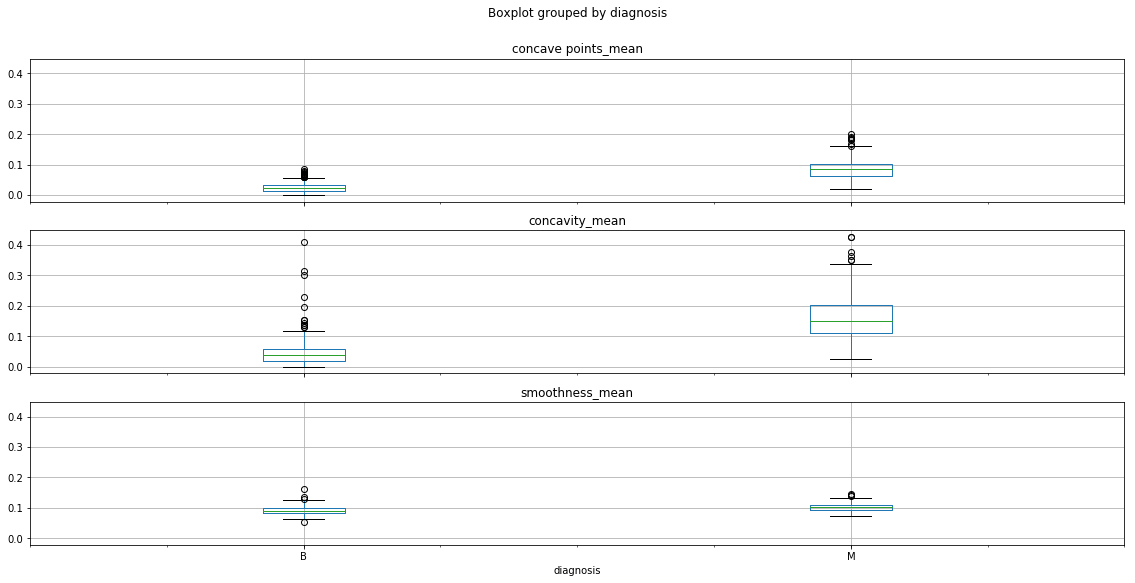

In [19]:
# Plotting a boxplot of the means of different features
boxplot = data.boxplot(column = ["concave points_mean","concavity_mean","smoothness_mean"], by="diagnosis", 
                    layout = (3, 1), figsize=(19, 9))
# Showing the boxplot
plt.show() 

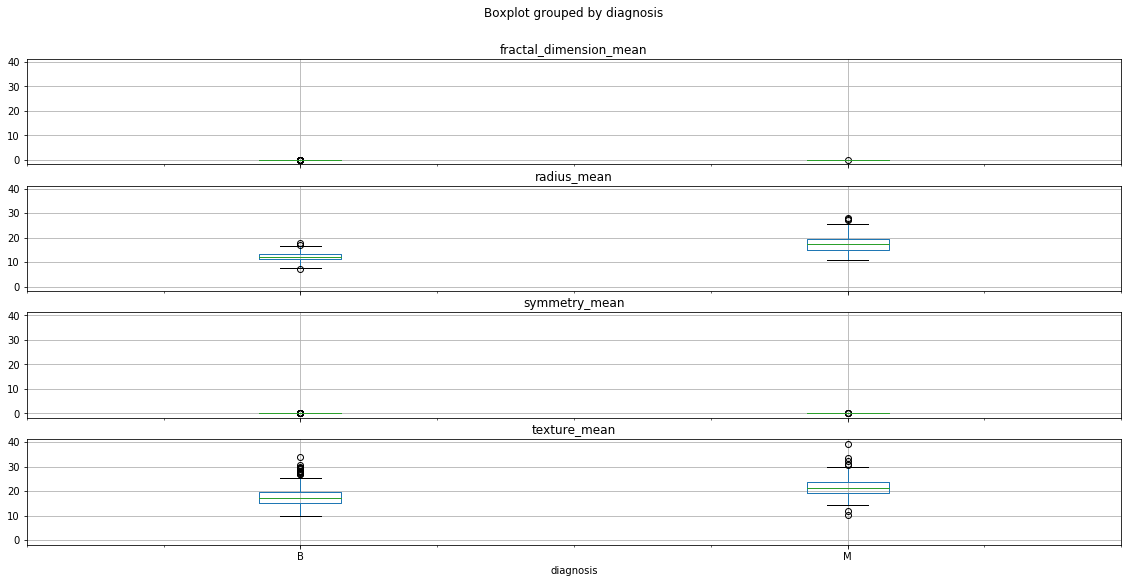

In [20]:
# Plotting a boxplot of the means of different features
boxplot = data.boxplot(column = ["fractal_dimension_mean","radius_mean","symmetry_mean","texture_mean"], by="diagnosis", 
                    layout = (4, 1), figsize=(19, 9))
# Showing the boxplot
plt.show() 

# Training-testing stage and using Knn model

In [21]:
#for train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [22]:
X_train.shape

(455, 30)

In [23]:
X_test.shape

(114, 30)

In [24]:
y_train.shape

(455,)

In [25]:
y_test.shape

(114,)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [27]:
X_train=scaler.fit_transform(X_train)

In [28]:
X_test=scaler.transform(X_test)

In [29]:
np.sqrt(X_train.shape[0])

21.330729007701542

In [30]:
k=21

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=k)

In [32]:
# Train our model
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=21, p=2,
           weights='uniform')

In [33]:
y_pred=knn.predict(X_test)

In [34]:
#accuracy of my prediction with the square root process

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9736842105263158

In [35]:

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

error_train=[]
error_test=[]

for i in range(1,26):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    x=confusion_matrix(y_train,knn.predict(X_train))
    y=confusion_matrix(y_test,knn.predict(X_test))
    error_train.append((x[0][1]+x[1][0])/x.sum())
    error_test.append((y[0][1]+y[1][0])/y.sum())

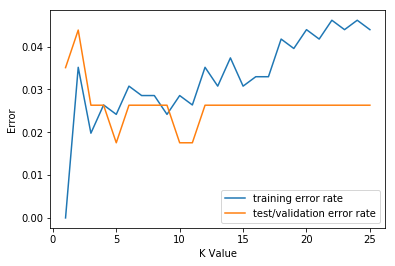

In [36]:
plt.plot(range(1,26),error_train,label='training error rate')
plt.plot(range(1,26),error_test,label='test/validation error rate')
plt.xlabel('K Value')
plt.ylabel('Error')
plt.legend()

In [37]:

knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

In [38]:
y_pred=knn.predict(X_test)

In [39]:
#accuracy of my prediction using trial and error method

accuracy_score(y_test,y_pred)

0.9824561403508771

# Creating function for predicting output according to the user values

In [48]:
def predict_output():
    X_new = []
    for i in X.columns:
        print("Enter the value for",i," : ")
        a = float(input())
        X_new.append(a)
    X_new = np.reshape(X_new,(1,30))
    X_new=scaler.transform(X_new)
    if knn.predict(X_new)[0]=='B':
        return "Probably it's a Benign Breast Cancer"
    else:
        return "Probably it's a Malignant Breast Cancer"

In [49]:
predict_output()

Enter the value for radius_mean  : 
9
Enter the value for texture_mean  : 
21
Enter the value for perimeter_mean  : 
55
Enter the value for area_mean  : 
222
Enter the value for smoothness_mean  : 
0.124
Enter the value for compactness_mean  : 
0.1
Enter the value for concavity_mean  : 
0.03
Enter the value for concave points_mean  : 
0.01
Enter the value for symmetry_mean  : 
0.2
Enter the value for fractal_dimension_mean  : 
0.08
Enter the value for radius_se  : 
0.36
Enter the value for texture_se  : 
2.07
Enter the value for perimeter_se  : 
2.5
Enter the value for area_se  : 
18.4
Enter the value for smoothness_se  : 
0.012
Enter the value for compactness_se  : 
0.032
Enter the value for concavity_se  : 
0.03
Enter the value for concave points_se  : 
0.009
Enter the value for symmetry_se  : 
0.034
Enter the value for fractal_dimension_se  : 
0.0031
Enter the value for radius_worst  : 
9.566
Enter the value for texture_worst  : 
27.04
Enter the value for perimeter_worst  : 
62.1
En

"Probably it's a Benign Breast Cancer"

# According to the user input, it was a Benign Breast 